In [1]:
selected_datasets = [
                        'ESOL',
                        'FreeSolv',
                        'lipophilicity',
                         'qm7',
                         'qm8',
                        'BACE',
                        'hiv',
                        'BBBP',
                        'tox21',
                        'toxcast',
                        'clintox',
                        'sider',
                    ]

In [2]:
selected_datasets_lower = [x.lower() for x in selected_datasets]

In [3]:
import os
import pandas as pd 

results_df = pd.DataFrame(columns=['Dataset', 'Mean Result', 'Stddev Result'])

base_path = '/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune'
file = 'pretrain+downstream_node'

for dataset in selected_datasets_lower:
    # file_name = 'pretrained_gin_{}_scaffold_random_masking_{}.csv'.format(dataset,file)
    # file_name = 'pretrained_gin_{}_balanced_scaffold{}.csv'.format(dataset,file)
    # file_name = 'pretrained_gin_{}_balanced_scaffold{}.csv'.format(dataset,file)
    file_name = '{}_{}.csv'.format(dataset,file)
    
    file_path = os.path.join(base_path ,file_name)
    
    
    if os.path.isfile(file_path):
        print(file_path)
        
        # Load the CSV file
        temp_df  = pd.read_csv(file_path)
        
        # Group by 'ratio' and calculate the mean and std for 'result'
        grouped = temp_df.groupby('ratio').agg({'result': ['mean', 'std']}).reset_index()
        grouped.columns = ['Ratio', 'Mean Result', 'Stddev Result']  # Flatten MultiIndex
        
        # Add the dataset column to the grouped DataFrame
        grouped['Dataset'] = dataset
        
        # Concatenate the grouped data with the results_df
        results_df = pd.concat([results_df, grouped[['Dataset', 'Ratio', 'Mean Result', 'Stddev Result']]], ignore_index=True)
    else:
        print(f"{file_path} 파일이 존재하지 않습니다.")

# 최종 결과 출력
print(results_df)


## 기본 결과

/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/esol_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/freesolv_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/lipophilicity_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/qm7_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/qm8_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/bace_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/hiv_pretrain+downstream_node.csv


/tmp/ipykernel_2360663/947167800.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, grouped[['Dataset', 'Ratio', 'Mean Result', 'Stddev Result']]], ignore_index=True)


/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/bbbp_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/tox21_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/toxcast_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/clintox_pretrain+downstream_node.csv
/tf/GraphMAE-pyg - copy/chem/results_pretrain+finetune/sider_pretrain+downstream_node.csv
          Dataset  Mean Result  Stddev Result  Ratio
0            esol     1.297096       0.007237   0.25
1            esol     1.286007       0.011027   0.50
2            esol     1.304088       0.027351   0.75
3            esol     1.291657       0.015856   1.00
4        freesolv     2.932592       0.225311   0.25
5        freesolv     2.867891       0.039861   0.50
6        freesolv     2.760055       0.066156   0.75
7        freesolv     4.815763       0.827418   1.00
8   lipophilicity     0.759274       0.003336   0.25
9   lipophilicity

In [9]:
# results_df.to_csv('./grouped_results_by_ratio.csv', index=False)

          Dataset  Mean Result  Stddev Result  Ratio
0            esol     1.297096       0.007237   0.25
1            esol     1.286007       0.011027   0.50
2            esol     1.304088       0.027351   0.75
3            esol     1.291657       0.015856   1.00
4        freesolv     2.932592       0.225311   0.25
5        freesolv     2.867891       0.039861   0.50
6        freesolv     2.760055       0.066156   0.75
7        freesolv     4.815763       0.827418   1.00
8   lipophilicity     0.759274       0.003336   0.25
9   lipophilicity     0.763854       0.002478   0.50
10  lipophilicity     0.771145       0.004207   0.75
11  lipophilicity     0.792534       0.006215   1.00
12            qm7    94.265929       1.414400   0.25
13            qm7    95.906216       2.404793   0.50
14            qm7    91.847476       2.499653   0.75
15            qm7    89.686768       2.088590   1.00
16            qm8     0.019131       0.000233   0.25
17            qm8     0.018849       0.000200 

In [4]:
results_df

,Dataset,Mean Result,Stddev Result,Ratio
0,esol,1.297096,0.007237,0.25
1,esol,1.286007,0.011027,0.50
2,esol,1.304088,0.027351,0.75
3,esol,1.291657,0.015856,1.00
4,freesolv,2.932592,0.225311,0.25
5,freesolv,2.867891,0.039861,0.50
6,freesolv,2.760055,0.066156,0.75
7,freesolv,4.815763,0.827418,1.00
8,lipophilicity,0.759274,0.003336,0.25
9,lipophilicity,0.763854,0.002478,0.50


In [5]:
# 각 데이터셋에 대해 mask_rate = 0 일 때의 값을 저장하는 딕셔너리
zero_mask_values = {
    'freesolv': 2.8178,
    'esol': 1.4305,
    'lipophilicity': 0.8170,
    'qm7' : 99.1721,
    'qm8':0.018608,
    
    'bace':0.7269,
    'bbbp':0.6902,
    'sider':0.5789,
    'tox21':0.7507,
    'toxcast':0.6270,
    'clintox':0.6230,
    'hiv':0.7585
}
# mask_rate = 0 항목 추가
new_rows = []
for dataset in selected_datasets_lower:
    zero_mask_mean = zero_mask_values.get(dataset, None)
    zero_mask_std = 0  # 필요에 따라 적절한 값을 설정
    
    zero_mask_row = {'Ratio': 0, 'Mean Result': zero_mask_mean, 'Stddev Result': zero_mask_std, 'Dataset': dataset}
    new_rows.append(zero_mask_row)

# 새로운 행들을 데이터프레임으로 변환 후 기존 결과 데이터프레임에 추가
new_rows_df = pd.DataFrame(new_rows)
results_df = pd.concat([results_df, new_rows_df], ignore_index=True)

results_df = results_df.sort_values(by=['Dataset', 'Ratio']).reset_index(drop=True)

freesolv


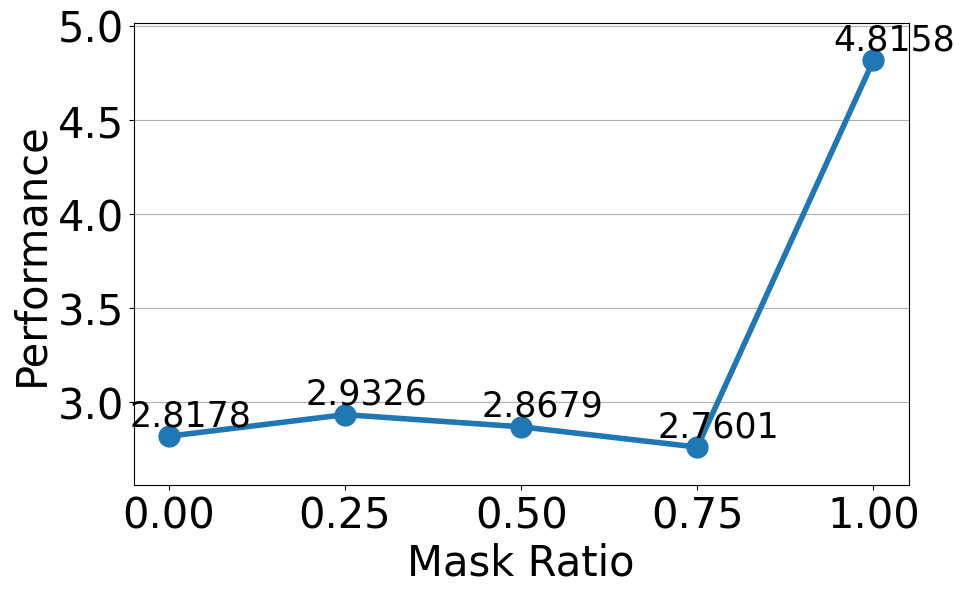

qm7


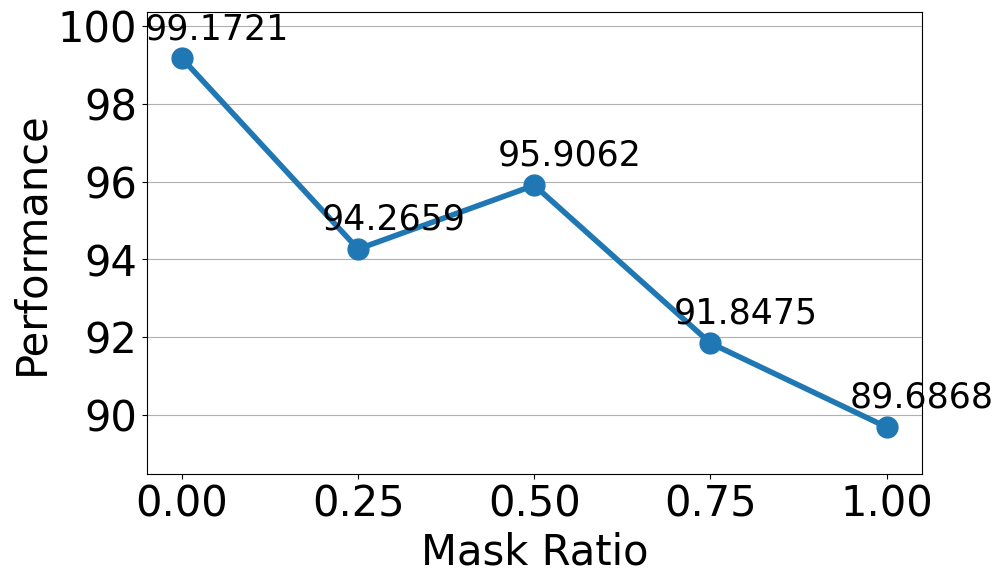

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results_df)
# 그룹화하여 각 데이터셋에 대한 꺾은선 그래프 그리기
for name, group in df.groupby('Dataset'):

    if name == 'freesolv' or name == 'qm7':
        print(name)
        
        plt.figure(figsize=(10, 6))
        plt.plot(group['Ratio'], group['Mean Result'], marker='o', markersize=15, linewidth = 4)
        # plt.title(f'Mean Result by Mask Rate for {name}')  # 제목 활성화
        plt.xlabel('Mask Ratio',fontsize= 30)
        plt.ylabel('Performance', fontsize= 30)
    
        add_y = {'bace': 0.009, 'bbbp': 0.005,  'clintox': 0.02, 'sider': 0.003, 'hiv': 0.001, 'toxcast': 0.003, 'tox21': 0.002,
                 'esol': 0.015, 'freesolv': 0.2, 'qm7': 1.2, 'qm8': 0.00007, 'lipophilicity': 0.005 }
    
        for x, y in zip(group['Ratio'], group['Mean Result']):
            if name == 'qm8':
                plt.text(x, y + add_y[name], f'{y:.5f}', color='black', ha='center', va='top', size=25)
            elif name == 'qm7':
                plt.text(x+0.05, y + add_y[name], f'{y:.4f}', color='black', ha='center', va='top', size=25)
                
            elif name == 'freesolv':
                plt.text(x+0.03, y + add_y[name], f'{y:.4f}', color='black', ha='center', va='top', size=25)
                
            else:
                plt.text(x, y + add_y[name], f'{y:.4f}', color='black', ha='center', va='top', size=25)
    
        y_min = group['Mean Result'].min() - add_y[name] 
        y_max = group['Mean Result'].max() + add_y[name] 
        plt.ylim(y_min, y_max)
    
        plt.xticks([0.00, 0.25, 0.50, 0.75, 1.00], fontsize=30)
        plt.yticks(fontsize=30)
        plt.grid(True, axis='y')
        plt.savefig(f"./ratio/{name}_plot.png", dpi=600, bbox_inches='tight')  # 파일 형식, 해상도 및 경계 조정 옵션 포함
        
        plt.show()
